# TDA  with Python using the Gudhi Library 

# Visualizing simplicial complexes techniques

**Authors**  : M. Glisse, V. Rouvreau

## Alpha complexes

We are going to [build a simplicial complex from a point cloud](Tuto-GUDHI-simplicial-complexes-from-data-points.ipynb). These points are randomly sampled from a 2-torus.

In [1]:
import numpy as np
import gudhi
ac = gudhi.AlphaComplex(off_file='datasets/tore3D_1307.off')
st = ac.create_simplex_tree()

We can retrieve coordinates for the points and triangles from the simplicial complex. Here, we limit the number of triangles by filtering them with their filtration values in the simplicial complex.

In [2]:
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
# We want to plot the alpha-complex with alpha=0.005 by default.
# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3 and s[1] <= 0.005])

### Matplotlib

A convenient library to display triangulations is [Matplotlib](https://matplotlib.org/).
Let's display the triangulation.

In [3]:
# For matplotlib in a notebook
%matplotlib inline

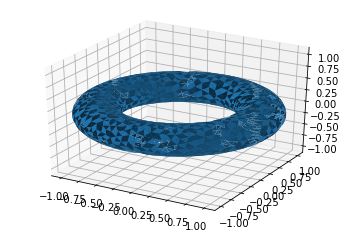

In [4]:
# Visualization with matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig = plt.figure()
ax = fig.gca(projection='3d')
l = ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)

plt.show()

### Plotly

Thanks to [Plotly](https://plot.ly/python/), we can also visualize triangulations. Here, we added some interactivity with a [slider widget](https://www.plot.ly/python/slider-widget/) to set the maximal filtration value to use for displaying triangles.

Dynamic display do not work on github as it only exports html and not the JavaScript when rendering. By the way you can try it on a binder instance: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/GUDHI/TDA-tutorial/master)

In [5]:
# Visualization with plotly
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go

init_notebook_mode()

fig = go.FigureWidget(data=[
    go.Mesh3d(
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0],
        j = triangles[:,1],
        k = triangles[:,2],
    )])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-1.5,1.5],),
        yaxis = dict(nticks=4, range=[-1.5,1.5],),
        zaxis = dict(nticks=4, range=[-1.5,1.5],),))

def update_triangle(alpha):
    if alpha < 0.0015:
        alpha = 0.0015
    print("Alpha: ", alpha)
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3 and s[1] <= alpha])
    print("Number of triangles: ", len(triangles[:,0]))
    fig.data[0].i = triangles[:,0]
    fig.data[0].j = triangles[:,1]
    fig.data[0].k = triangles[:,2]

from ipywidgets import interactive, HBox, VBox
alpha_slider = interactive(update_triangle, alpha=(0, 0.01, 0.0001))
vb = VBox((fig, alpha_slider))
vb.layout.align_items = 'center'
vb

Alpha:  0.005
Number of triangles:  2503


### Other libraries

Another examples are also available [here](https://gudhi.inria.fr/python/latest/examples.html):
- plot_rips_complex.py
- plot_alpha_complex.py

You can visualize the Simplicial complex thanks to [Mayavi](https://docs.enthought.com/mayavi/mayavi/).

One may be able to use [iPyVolume meshes](https://ipyvolume.readthedocs.io/en/latest/mesh.html) for instance.
But we are not going to make an exhaustive list of visualization tools in Python.